In [24]:
%matplotlib notebook
import numpy as np
import os
import pickle 

# Expected shape is 1175 Trials x 13 channels x 2400 samples (@ 5000Hz) - value is potential
raw_source_dir = "NO_FFT_NOT_FLAT/"

files = ['x_train.pickle']
# files = ['x_train.pickle', 'y_train.pickle', 'x_test.pickle', 'y_test.pickle']
file_data = []
for i, fn in enumerate(files):
    files[i] = os.path.join(raw_source_dir, fn)
    with open(os.path.join(raw_source_dir, fn), 'rb') as f:
        file_data.append(np.array(pickle.load(f)))

trial = 0
channel = 0
        
x_train = file_data[0]

x_channel = x_train[trial,channel,]

x_train_snippets = np.split(x_train, 96, axis=2) # Split on last axis (25ms samples)
x_train_fft = np.fft.fft(x_train)
# Convert x_train_snippets via FFT here
x_train_stacked = np.stack(x_train_snippets) # Create 24x1175x13x?? Frequency domain features here
# y_train = file_data[1]
# x_test = file_data[2] 
# y_test = file_data[3]
# Split into 10 samples of 240 Hz, assess 
print(x_train.shape)
print(x_train_fft.shape)

(1175, 13, 2400)
(1175, 13, 2400)


<IPython.core.display.Javascript object>


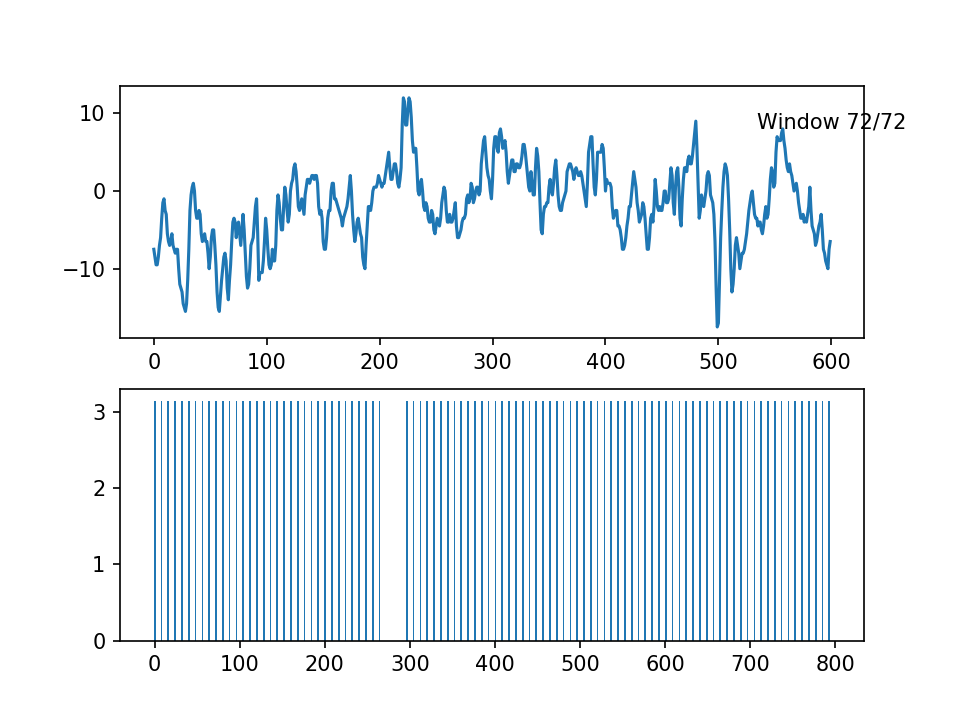

In [25]:
# Visualize frequency
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 1)
axarr[1].set_title("Frequency domain")
# axarr[0].xlabel("Sample")
# Referencing http://forrestbao.blogspot.com/2009/10/eeg-signal-processing-in-python-and.html
# And https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/

fs = 5000.0

# Create windows
sample_length = x_channel.shape[-1]
window_length = 625
step_size = 25
roll_cap = (sample_length - window_length)//step_size + 1
roll_ctr = 0

# Prepare fft
f = np.linspace(0,fs, window_length) # 5000/625 -> resolution of about 8Hz...

axarr[0].set_title("Frequency Domain")
plt.ion()
fig.show()
# fig.canvas.draw()
banded_freq = 100
while roll_ctr < roll_cap:
    window_sample = x_channel[roll_ctr * step_size: roll_ctr * step_size + window_length]
    axarr[0].clear()
    axarr[0].plot(window_sample)
    axarr[0].text(600, 8, "Window {}/{}".format(roll_ctr, roll_cap), horizontalalignment='center')
    
    axarr[1].clear()
    amplitudes = np.abs(np.fft.rfft(window_sample)[:-1]) / window_length # fft over whole time frame
#     phases = np.angle(window_sample)[:-1] # This is only printing 0 or pi? Could be really useful
#     print(phases[:2])
    axarr[1].bar(f[:banded_freq], phases[:banded_freq], width=2)
    
    fig.canvas.draw()
    roll_ctr += 1
# banded_freq = 100
# axarr[1].bar(f[:L//2], amplitudes/L, width=2)
# axarr[1].bar(f[:banded_freq], amplitudes[:banded_freq], width=2)
# plt.pause(0.05)